In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv (r'C:\Users\Sharon & Floyd\Downloads\AI files\Capstone\Financial\train_data.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [4]:
data.Class.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [5]:
data.mean()

Time      94752.853076
V1           -0.003321
V2           -0.001652
V3            0.001066
V4           -0.000374
V5            0.000877
V6            0.000770
V7           -0.000035
V8            0.001625
V9           -0.000391
V10          -0.000794
V11           0.002083
V12           0.000010
V13           0.000080
V14           0.000928
V15          -0.000737
V16           0.000433
V17          -0.000007
V18          -0.000831
V19          -0.000191
V20           0.000671
V21           0.000563
V22           0.001234
V23          -0.001002
V24           0.000254
V25           0.000218
V26          -0.001128
V27          -0.000346
V28           0.000498
Amount       88.522327
Class         0.001729
dtype: float64

In [6]:
data.std()

Time      47500.410602
V1            1.963028
V2            1.661178
V3            1.516107
V4            1.415061
V5            1.367074
V6            1.325341
V7            1.220384
V8            1.192648
V9            1.097367
V10           1.087268
V11           1.021904
V12           0.999581
V13           0.995449
V14           0.959575
V15           0.916011
V16           0.875795
V17           0.851222
V18           0.838685
V19           0.812614
V20           0.772535
V21           0.734187
V22           0.724544
V23           0.625165
V24           0.606012
V25           0.521348
V26           0.482314
V27           0.400286
V28           0.331184
Amount      248.100141
Class         0.041548
dtype: float64

In [7]:
data.isnull().values.any()

False

In [8]:
data.isna().values.any()

False

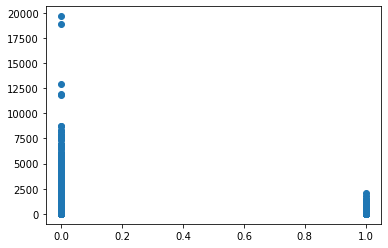

In [9]:
plt.scatter(data.Class, data.Amount)

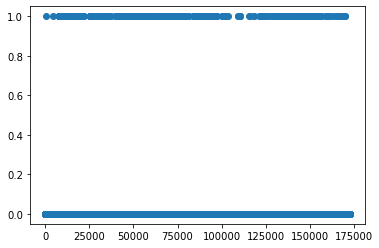

In [10]:
plt.scatter(data.Time, data.Class)

In [11]:
data.Class.value_counts()

0    227451
1       394
Name: Class, dtype: int64

### Normalizing data for Time and Amount prior to running analysis

In [12]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data.Amount = scale.fit_transform(data[['Amount']])
data.Time = scale.fit_transform(data[['Time']])
data.mean()

Time      0.548364
V1       -0.003321
V2       -0.001652
V3        0.001066
V4       -0.000374
V5        0.000877
V6        0.000770
V7       -0.000035
V8        0.001625
V9       -0.000391
V10      -0.000794
V11       0.002083
V12       0.000010
V13       0.000080
V14       0.000928
V15      -0.000737
V16       0.000433
V17      -0.000007
V18      -0.000831
V19      -0.000191
V20       0.000671
V21       0.000563
V22       0.001234
V23      -0.001002
V24       0.000254
V25       0.000218
V26      -0.001128
V27      -0.000346
V28       0.000498
Amount    0.004503
Class     0.001729
dtype: float64

### 3.    Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [14]:
smote = SMOTE(random_state=0)

In [15]:
X_original = data.drop(columns='Class')
Y_original = data.Class

In [16]:
Y_original.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [17]:
data.shape

(227845, 31)

In [18]:
X,Y=smote.fit_resample(X_original,Y_original)
Y.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
x_train_original, x_test_original,y_train_original, y_test_original = train_test_split(X_original,Y_original, test_size=0.3, random_state=0)

In [21]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(318431, 30) (136471, 30) (318431,) (136471,)


In [22]:
print (x_train_original.shape, x_test_original.shape, y_train_original.shape, y_test_original.shape)

(159491, 30) (68354, 30) (159491,) (68354,)


In [23]:
## using Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [25]:
NB = GaussianNB()
NBO = GaussianNB()
NB.fit(x_train, y_train)
NBO.fit(x_train_original,y_train_original)

GaussianNB()

In [26]:
LR = LogisticRegression()
LRO = LogisticRegression()
LR.fit(x_train, y_train)
LRO.fit(x_train_original,y_train_original)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

LogisticRegression()

In [27]:
# SVM = svm.SVC(kernel='sigmoid', gamma='auto')
# SVM.fit(x_train, y_train)

In [28]:
from sklearn.metrics import classification_report, roc_auc_score


Project Task: Week 2

Modeling Techniques:

Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best
Use different Tree-based classifiers like Random Forest and XGBoost. 
       a.    Remember Tree-based classifiers work on two ideologies: Bagging or Boosting
       b.    Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. Random-Forest and XGBboost.
Compare the results of 1 with 2 and check if there is any incremental gain.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [30]:
RF=RandomForestClassifier()
RFO=RandomForestClassifier()
XGB=XGBClassifier()
XGBO=XGBClassifier()

In [31]:
RF.fit(x_train, y_train)
RFO.fit(x_train_original,y_train_original)

RandomForestClassifier()

In [32]:
XGB.fit(x_train, y_train)
XGBO.fit(x_train_original,y_train_original)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print ('Naive Bayes original:\n',classification_report(y_test_original,NBO.predict(x_test_original)))
print ('Naive Bayes smote:\n',classification_report(y_test,NB.predict(x_test)))
print ('Logistic Regression original:\n',classification_report(y_test_original,LRO.predict(x_test_original)))
print ('Logistic Regression smote:\n',classification_report(y_test,LR.predict(x_test)))
print ('random forest original:',classification_report(y_test_original,RF.predict(x_test_original)))
print ('random forest smote:',classification_report(y_test,RF.predict(x_test)))
print ('XGBoost original:',classification_report(y_test_original,XGB.predict(x_test_original)))
print ('XGBoost smote:',classification_report(y_test,XGB.predict(x_test)))

Naive Bayes original:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     68236
           1       0.06      0.86      0.11       118

    accuracy                           0.98     68354
   macro avg       0.53      0.92      0.55     68354
weighted avg       1.00      0.98      0.99     68354

Naive Bayes smote:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92     68376
           1       0.97      0.86      0.91     68095

    accuracy                           0.92    136471
   macro avg       0.92      0.92      0.92    136471
weighted avg       0.92      0.92      0.92    136471

Logistic Regression original:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     68236
           1       0.88      0.63      0.73       118

    accuracy                           1.00     68354
   macro avg       0.94      0.81      0.87     68354


Project Task: Week 3

Applying ANN:

Use ANN (Artificial Neural Network) to identify fradulent and non-fradulent.
       a)    Fine-tune number of layers
       b)    Number of Neurons in each layers
       c)    Experiment in batch-size
       d)    Experiment with number of epochs. Check the observations in loss and accuracy
       e)    Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
       f)    Find out which activation performs best for this use case and why?
       g)    Check Confusion Matrix, Precision, Recall and F1-Score

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [35]:
classifier = Sequential ()

In [36]:
y_train.shape

(318431,)

In [37]:
from tensorflow.keras.layers import Dense, Dropout, Input

In [38]:
classifier.add (Dense(15, input_dim = 30, activation = 'relu'))
classifier.add (Dense (10, activation = 'relu'))
classifier.add (Dense (8, activation = 'relu'))
classifier.add (Dense (1, activation = 'sigmoid'))

classifier.compile (loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                465       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 722
Trainable params: 722
Non-trainable params: 0
_________________________________________________________________


In [39]:
classifier.fit (x_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
31844/31844 [==============================] - 37s 1ms/step - loss: 0.0338 - accuracy: 0.9884
Epoch 2/10
31844/31844 [==============================] - 37s 1ms/step - loss: 0.0107 - accuracy: 0.9972
Epoch 3/10
31844/31844 [==============================] - 37s 1ms/step - loss: 0.0084 - accuracy: 0.9979
Epoch 4/10
31844/31844 [==============================] - 37s 1ms/step - loss: 0.0068 - accuracy: 0.9983
Epoch 5/10
31844/31844 [==============================] - 37s 1ms/step - loss: 0.0060 - accuracy: 0.9986
Epoch 6/10
31844/31844 [==============================] - 37s 1ms/step - loss: 0.0055 - accuracy: 0.9988
Epoch 7/10
31844/31844 [==============================] - 37s 1ms/step - loss: 0.0050 - accuracy: 0.9989
Epoch 8/10
31844/31844 [==============================] - 37s 1ms/step - loss: 0.0047 - accuracy: 0.9989
Epoch 9/10
31844/31844 [==============================] - 36s 1ms/step - loss: 0.0044 - accuracy: 0.9991
Epoch 10/10
31844/31844 [==============================

In [40]:
predict = classifier.predict(x_test)

In [41]:
PREDICT = [value for pos in predict.tolist() for value in pos]

PREDICT_sigmoid = []

for value in PREDICT: 
    if value<0.5: 
        value = 0   
    else: 
        value=1
    PREDICT_sigmoid.append (value)



In [42]:
print (classification_report(y_test.values.tolist(), PREDICT_sigmoid ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68376
           1       1.00      1.00      1.00     68095

    accuracy                           1.00    136471
   macro avg       1.00      1.00      1.00    136471
weighted avg       1.00      1.00      1.00    136471



In [43]:
classifier.fit (x_train_original, y_train_original, batch_size = 10, epochs = 10)

Epoch 1/10
15950/15950 [==============================] - 19s 1ms/step - loss: 0.0031 - accuracy: 0.9992
Epoch 2/10
15950/15950 [==============================] - 19s 1ms/step - loss: 0.0024 - accuracy: 0.9993
Epoch 3/10
15950/15950 [==============================] - 19s 1ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 4/10
15950/15950 [==============================] - 18s 1ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 5/10
15950/15950 [==============================] - 19s 1ms/step - loss: 0.0020 - accuracy: 0.9994
Epoch 6/10
15950/15950 [==============================] - 19s 1ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 7/10
15950/15950 [==============================] - 18s 1ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 8/10
15950/15950 [==============================] - 19s 1ms/step - loss: 0.0020 - accuracy: 0.9994
Epoch 9/10
15950/15950 [==============================] - 19s 1ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 10/10
15950/15950 [==============================

In [44]:
predict = classifier.predict(x_test_original)

PREDICT = [value for pos in predict.tolist() for value in pos]

PREDICT_sigmoid = []

for value in PREDICT: 
    if value<0.5: 
        value = 0   
    else: 
        value=1
    PREDICT_sigmoid.append (value)


In [45]:
print (classification_report(y_test_original.values.tolist(), PREDICT_sigmoid ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68236
           1       0.87      0.81      0.84       118

    accuracy                           1.00     68354
   macro avg       0.94      0.91      0.92     68354
weighted avg       1.00      1.00      1.00     68354



In [46]:
# 2.    Try out Dropout for ANN. How is it performed? Compare model performance with the traditional
#ML based prediction models from above. 

In [47]:
classifier.add (Dense(15, input_dim = 30, activation = 'relu'))
classifier.add (Dense (10, activation = 'relu') )
classifier.add(Dropout(0.3))
classifier.add (Dense (8, activation = 'relu'))
classifier.add (Dense (1, activation = 'sigmoid'))

classifier.compile (loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                465       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0

In [48]:
classifier.fit (x_train_original, y_train_original, batch_size = 10, epochs = 20)

Epoch 1/20
15950/15950 [==============================] - 21s 1ms/step - loss: 0.0144 - accuracy: 0.9983
Epoch 2/20
15950/15950 [==============================] - 21s 1ms/step - loss: 0.0047 - accuracy: 0.9988
Epoch 3/20
15950/15950 [==============================] - 21s 1ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 4/20
15950/15950 [==============================] - 21s 1ms/step - loss: 0.0039 - accuracy: 0.9989
Epoch 5/20
15950/15950 [==============================] - 21s 1ms/step - loss: 0.0036 - accuracy: 0.9990
Epoch 6/20
15950/15950 [==============================] - 21s 1ms/step - loss: 0.0037 - accuracy: 0.9990
Epoch 7/20
15950/15950 [==============================] - 21s 1ms/step - loss: 0.0036 - accuracy: 0.9989
Epoch 8/20
15950/15950 [==============================] - 21s 1ms/step - loss: 0.0034 - accuracy: 0.9990
Epoch 9/20
15950/15950 [==============================] - 21s 1ms/step - loss: 0.0031 - accuracy: 0.9991
Epoch 10/20
15950/15950 [==============================

In [49]:
predict = classifier.predict(x_test_original)



In [50]:
PREDICT = [value for pos in predict for value in pos]

In [51]:
PREDICT= pd.Series(PREDICT)
PREDICT = PREDICT.apply(lambda x: 0 if x<0.5 else 1)
PREDICT

0        0
1        0
2        0
3        0
4        0
        ..
68349    0
68350    0
68351    0
68352    0
68353    0
Length: 68354, dtype: int64

In [52]:
print (classification_report(y_test_original.values.tolist(), PREDICT_sigmoid ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68236
           1       0.87      0.81      0.84       118

    accuracy                           1.00     68354
   macro avg       0.94      0.91      0.92     68354
weighted avg       1.00      1.00      1.00     68354



In [53]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    
    classifier = Sequential ()

    classifier.add (Dense(15, input_dim = 30, activation = 'relu'))
    classifier.add (Dense (10, activation = 'relu') )
    classifier.add(Dropout(0.3))
    classifier.add (Dense (8, activation = 'relu'))
    classifier.add (Dense (1, activation = 'sigmoid'))

    classifier.compile (loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return classifier

    
classifier = KerasClassifier(build_fn=create_model, verbose=0)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)

grid_result = grid.fit(x_train_original, y_train_original)

In [54]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.999360 using {'batch_size': 60, 'epochs': 10}


Anomaly Detection:

Implement anomaly detection algorithms. a) Assume that the data is coming from a single or a combination of multivariate Gaussian b) Formalize a scoring criterion, which gives a scoring probability for the given data point whether it belongs to the
   multivariate Gaussian or Normal Distribution fitted in a)

In [55]:
hkjhjkll;kl;n
def estimateGaussian(X):
    m = x_test.shape[0]
    #compute mean of X
    sum_ = np.sum(X,axis=0)
    mu = (sum_/m)
    # compute variance of X
    var = np.var(X,axis=0)
    print(mu, var)
    return mu,var

NameError: name 'hkjhjkll' is not defined

In [ ]:
from sklearn.cluster import DBSCAN 
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(x_train_original)

In [ ]:
labels = dbscan.labels_

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(20, 10))
sns.scatterplot(x_train_original, x_train_original, hue=["cluster-{}".format(x) for x in labels])

In [ ]:
labels.shape

Project Task: Week 4

Inference and Observations:

Visualize the scores for Fraudulent and Non-Fraudulent transactions.
Find out the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.
Can this score be used as an engineered feature in the models developed previously? Are there any incremental gains in F1-Score? Why or Why not?
Be as creative as possible in finding other interesting insights.